In [ ]:
#
# Copyright 2018-2019 IBM Corp. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Face Recognition Example

In this example, we show how the MAX-Facial-Recognizer model can be used to recognize faces. 

## Content of this demo

We first use an example image to check that the REST API works, and then visualize the three test images, two of which are for Paul Rudd and one is for Chris Pratt. These images are passed to the  MAX-Facial-Recognizer model to get their embedding vectors. Based on these vectors, we can identify whether two images belong to a same person or not.




In [1]:
%%bash
# Install the required packages
pip install -q numpy scipy matplotlib Pillow requests 

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import requests

In [3]:
url = 'http://localhost:5000/model/predict'

def facenet(input_img):
    """
    Takes in input image file path and generates face embeddings/bboxes.
    """
    files = {'image': ('image.jpg',open(input_img,'rb'), 'images/jpeg')}
    r = requests.post(url, files=files).json()
    
    return r

In [4]:
def same_person(img1, img2, threshold=0.95):
    """
    Determines if two images belong to the same face/person.
    
    This function is a simple example to show how to use the 
    model to detect faces in images and generate the embedding 
    vectors to identify people. The hard-coded `threshold` 
    may not work for all images. With more label data, users
    could train a classifier (e.g., SVM) to perform the 
    classification with higer accuracy.
    """
    emb1 = facenet(img1)['predictions'][0]['embedding']
    emb2 = facenet(img2)['predictions'][0]['embedding']
    
    return np.linalg.norm(np.asarray(emb1)-np.asarray(emb2)) <= threshold

In [5]:
##Sanity check that it works
preds = facenet('Lenna.jpg')
print(preds['status'])

ok


In [6]:
paul1 = 'Paul.jpeg'
paul2 = 'Paul2.jpeg'
chris = 'Chris.jpeg'

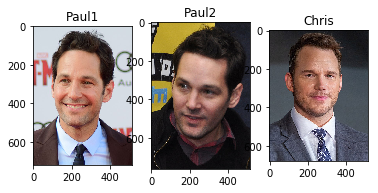

In [7]:
##Visualize the test images
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(plt.imread(paul1))
plt.title("Paul1")
plt.subplot(1, 3, 2)
plt.imshow(plt.imread(paul2))
plt.title("Paul2")
plt.subplot(1, 3, 3)
plt.imshow(plt.imread(chris))
plt.title("Chris")
plt.show()

In [8]:
# Check if these two images belong to a same person
print(same_person(paul1,paul2))

True


In [9]:
print(same_person(paul1,chris))

False


In [10]:
print(same_person(paul2,chris))

False
